In [222]:
import pandas as pd
df = pd.read_csv("Clean Sales Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185949 entries, 0 to 185948
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   295665                                  185949 non-null  int64  
 1   Macbook Pro Laptop                      185949 non-null  object 
 2   1                                       185949 non-null  int64  
 3   1700                                    185949 non-null  float64
 4   2019-12-30 00:01:00.0000000             185949 non-null  object 
 5   136 Church St, New York City, NY 10001  185949 non-null  object 
 6   12                                      185949 non-null  int64  
 7   1700.1                                  185949 non-null  float64
 8   New York City                           185949 non-null  object 
 9   0                                       185949 non-null  int64  
 10  Night                                   1859

In [224]:
import pandas as pd

# Giả sử df là DataFrame ban đầu của bạn
# df = pd.read_csv('your_data.csv')  # Ví dụ để tạo DataFrame từ file CSV

# Lưu tiêu đề hiện tại
header_row = df.columns.tolist()  # Lưu tiêu đề vào danh sách

# Tạo một DataFrame mới từ dữ liệu hiện tại
data = df.copy()  # Giữ lại dữ liệu

# Thêm hàng tiêu đề vào vị trí đầu tiên
data.loc[-1] = header_row  # Chèn tiêu đề làm hàng đầu tiên
data.index = data.index + 1  # Đẩy các chỉ số xuống
data = data.sort_index()  # Sắp xếp lại chỉ số

# Đặt lại tên cột
data.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 
                'Purchase_Address', 'Month', 'Sales', 'City', 'Hour', 
                'Day_Part', 'Region', 'Product_Category', 'Is_Expensive', 
                'Season', 'Holiday_Season', 'Repeat_Customer']

# Hiển thị DataFrame
print(data.head(10))  # Hiển thị 10 hàng đầu tiên để kiểm tra


  Order_ID                     Product Quantity_Ordered  Price_Each  \
0   295665          Macbook Pro Laptop                1        1700   
1   295666          LG Washing Machine                1       600.0   
2   295667        USB-C Charging Cable                1       11.95   
3   295668            27in FHD Monitor                1  149.990005   
4   295669        USB-C Charging Cable                1       11.95   
5   295670       AA Batteries (4-pack)                1        3.84   
6   295671        USB-C Charging Cable                1       11.95   
7   295672        USB-C Charging Cable                2       11.95   
8   295673  Bose SoundSport Headphones                1   99.989998   
9   295674      AAA Batteries (4-pack)                4        2.99   

                    Order_Date                           Purchase_Address  \
0  2019-12-30 00:01:00.0000000     136 Church St, New York City, NY 10001   
1  2019-12-29 07:03:00.0000000        562 2nd St, New York City,

In [226]:
data.shape

(185950, 17)

In [228]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 185949
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity_Ordered  185950 non-null  object
 3   Price_Each        185950 non-null  object
 4   Order_Date        185950 non-null  object
 5   Purchase_Address  185950 non-null  object
 6   Month             185950 non-null  object
 7   Sales             185950 non-null  object
 8   City              185950 non-null  object
 9   Hour              185950 non-null  object
 10  Day_Part          185950 non-null  object
 11  Region            185950 non-null  object
 12  Product_Category  185950 non-null  object
 13  Is_Expensive      185950 non-null  object
 14  Season            185950 non-null  object
 15  Holiday_Season    185950 non-null  object
 16  Repeat_Customer   185950 non-null  object
d

In [42]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   -- ------------------------------------ 20.5/282.6 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 544.7 kB/s eta 0:00:01
   ---------------------- --------------- 163.8/282.6 kB 984.6 kB/s eta 0:00:01
   ------------------------------------ --- 256.0/282.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.2 MB/s eta 0:00:00


   Quantity_Ordered  Price_Each     Month     Sales      Hour  City_Atlanta  \
0         -0.280906    4.555039  1.410471  4.549484 -2.657613           0.0   
1         -0.280906    1.249060  1.410471  1.245075 -1.366911           0.0   
2         -0.280906   -0.518287  1.410471 -0.521271  0.661337           0.0   
3         -0.280906   -0.103416  1.410471 -0.106635  0.108178           0.0   
4         -0.280906   -0.518287  1.410471 -0.521271 -0.444980           1.0   

   City_Austin  City_Boston  City_Dallas  City_Los Angeles  \
0          0.0          0.0          0.0               0.0   
1          0.0          0.0          0.0               0.0   
2          0.0          0.0          0.0               0.0   
3          0.0          0.0          0.0               0.0   
4          0.0          0.0          0.0               0.0   

   City_New York City  City_Portland  City_San Francisco  City_Seattle  
0                 1.0            0.0                 0.0           0.0  
1     

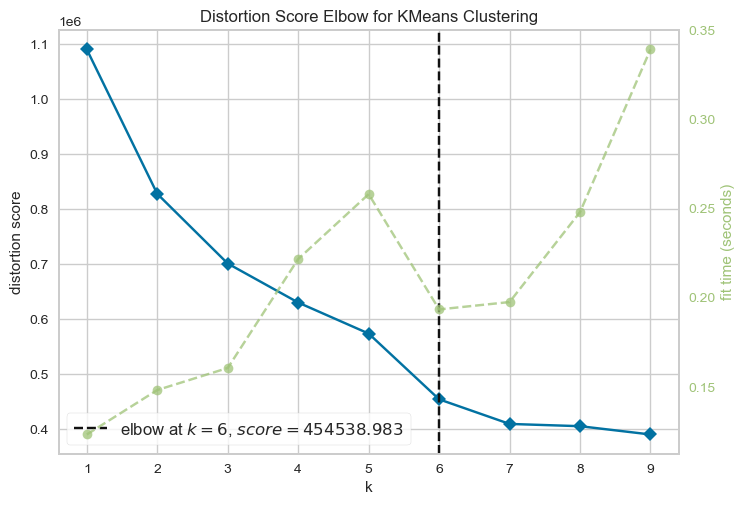

In [230]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Xử lý giá trị thiếu nếu có
data = data.dropna()

# Chuyển đổi các cột sang kiểu dữ liệu phù hợp
data['Quantity_Ordered'] = pd.to_numeric(data['Quantity_Ordered'], errors='coerce')
data['Price_Each'] = pd.to_numeric(data['Price_Each'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')

# Xóa các hàng bị thiếu sau khi chuyển đổi
data = data.dropna()

# Quy trình để tiền xử lý và chuẩn hóa dữ liệu
numeric_features = ["Quantity_Ordered", "Price_Each", "Month", "Sales", "Hour"]
categorical_features = ["City"]  # Cột phân loại

# Tạo các transformer cho việc chuẩn hóa
numeric_transformer = make_pipeline(
    StandardScaler(),
)

categorical_transformer = OneHotEncoder()  # Mã hóa các thành phố thành các cột riêng

# Bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Chuẩn hóa dữ liệu
data_pro = preprocessor.fit_transform(data)

# Lấy tên các cột đã được chuẩn hóa
categorical_transformer.fit(data[categorical_features])  # Fitting categorical transformer trước
city_categories = categorical_transformer.get_feature_names_out(categorical_features)

# Kết hợp các tên cột của các đặc trưng số và đặc trưng phân loại (mã hóa)
col_names = numeric_features + list(city_categories)

# Chuyển đổi dữ liệu đã được chuẩn hóa thành DataFrame
data_pro = pd.DataFrame(data_pro, columns=col_names)
print(data_pro.head())

# Phương pháp Khuỷu tay để xác định số lượng cụm
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(data_pro)  # Khớp dữ liệu với công cụ trực quan hóa
visualizer.show();


In [232]:
# Khởi tạo và huấn luyện mô hình K-means với k=6
kmeans = KMeans(n_clusters=6, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_pro)

# Xem các cụm đã được gán
data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Day_Part,Region,Product_Category,Is_Expensive,Season,Holiday_Season,Repeat_Customer,Cluster
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00.0000000,"136 Church St, New York City, NY 10001",12,1700.100000,New York City,0,Night,Northeast,Electronics,Yes,Winter,No Holiday,No,5
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00.0000000,"562 2nd St, New York City, NY 10001",12,600.000000,New York City,7,Morning,Northeast,Home Appliances,No,Winter,No Holiday,No,3
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00.0000000,"277 Main St, New York City, NY 10001",12,11.950000,New York City,18,Afternoon,Northeast,Accessories,No,Winter,No Holiday,No,0
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00.0000000,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco,15,Afternoon,West,Electronics,No,Winter,No Holiday,Yes,0
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta,12,Morning,South,Accessories,No,Winter,No Holiday,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00.0000000,"795 Pine St, Boston, MA 02215",6,2.990000,Boston,19,Evening,Northeast,Accessories,No,Summer,No Holiday,Yes,1
185946,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00.0000000,"495 North St, New York City, NY 10001",6,149.990005,New York City,19,Evening,Northeast,Electronics,No,Summer,No Holiday,Yes,1
185947,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00.0000000,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,1
185948,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00.0000000,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco,18,Afternoon,West,Accessories,No,Summer,No Holiday,Yes,1


In [234]:
data.to_csv('Cluster_Customer.csv', index=False)